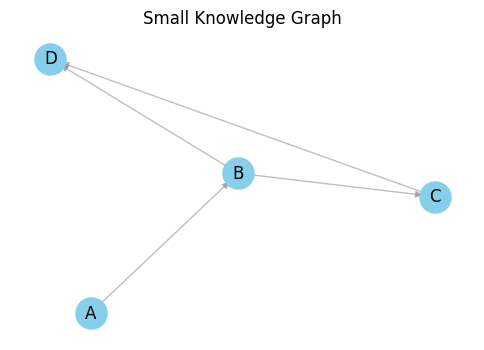

In [ ]:
import networkx as nx #tool for creating, analyzing,and visualizing graphs in python
import matplotlib.pyplot as plt #used for plotting and visualizing data,including graphs.

# Step 1: Initialize a directed graph
kg = nx.DiGraph()  #Directed Graphs have edges that point in a specific direction,from source node to a target node.

# Step 2: Add nodes to the graph
nodes = ['A', 'B', 'C', 'D']
for node in nodes:
    kg.add_node(node)

# Step 3: Add edges to the graph
edges = [('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'D')]
for edge in edges:
    kg.add_edge(edge[0], edge[1])

# Step 4: Visualize the knowledge graph
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(kg)  # Positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(kg, pos, node_color='skyblue', node_size=500)

# Draw edges
nx.draw_networkx_edges(kg, pos, width=1.0, alpha=0.5, edge_color='gray')

# Draw labels
nx.draw_networkx_labels(kg, pos, font_size=12, font_family='sans-serif')

plt.title("Small Knowledge Graph")
plt.axis('off')
plt.show()


In [ ]:
pip install networkx

In [ ]:
pip install pyvis

In [ ]:
import networkx as nx
from pyvis.network import Network

# Step 1: Initialize a directed graph
kg = nx.DiGraph()

# Step 2: Add nodes to the graph
nodes = ['A', 'B', 'C', 'D']
for node in nodes:
    kg.add_node(node)

# Step 3: Add edges to the graph
edges = [('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'D')]
for edge in edges:
    kg.add_edge(edge[0], edge[1])

# Step 4: Visualize the knowledge graph with pyvis
nt = Network(height='500px', width='700px')
nt.from_nx(kg)
nt.write_html('knowledge_graph.html')



Drugs targeting gene Target1: ['Drug1']


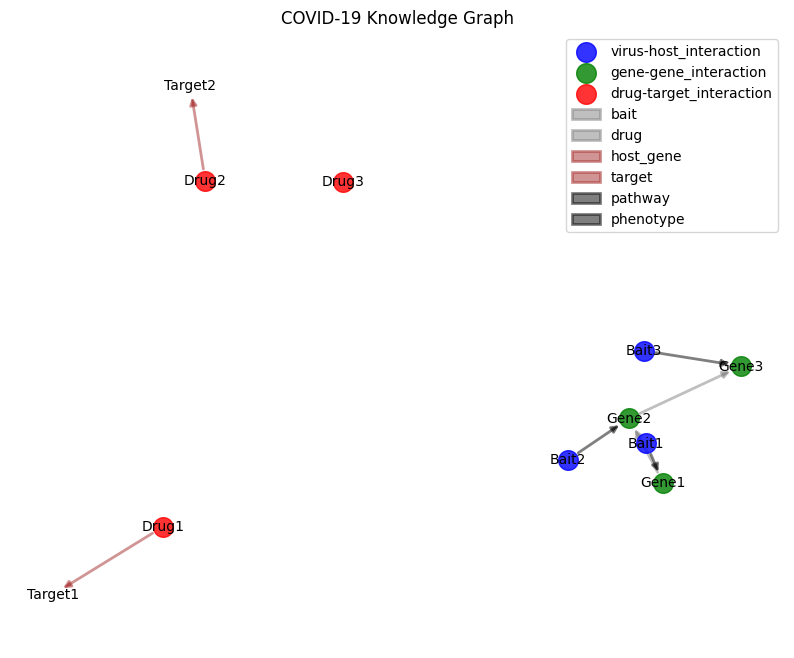

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Define classes for nodes and edges
class Node:
    def __init__(self, name, node_type):
        self.name = name
        self.node_type = node_type

class Edge:
    def __init__(self, source, target, edge_type):
        self.source = source
        self.target = target
        self.edge_type = edge_type

# Step 2: Define functions to create nodes and edges
def create_node(name, node_type):
    return Node(name, node_type)

def create_edge(source, target, edge_type):
    return Edge(source, target, edge_type)

# Step 3: Initialize a directed graph
covid_kg = nx.DiGraph()

# Step 4: Add nodes to the graph
baits = ["Bait1", "Bait2", "Bait3"]  # List of bait proteins
host_genes = ["Gene1", "Gene2", "Gene3"]  # List of host genes
drugs = ["Drug1", "Drug2", "Drug3"]  # List of drugs
targets = ["Target1", "Target2", "Target3"]  # List of drug targets
pathways = ["Pathway1", "Pathway2", "Pathway3"]  # List of pathways
phenotypes = ["Phenotype1", "Phenotype2", "Phenotype3"]  # List of phenotypes

for bait in baits:
    covid_kg.add_node(bait, type="bait")

for gene in host_genes:
    covid_kg.add_node(gene, type="host_gene")

for drug in drugs:
    covid_kg.add_node(drug, type="drug")

# Similarly add nodes for targets, pathways, and phenotypes

# Step 5: Add edges to the graph
virus_host_interactions = [("Bait1", "Gene1", "virus-host_interaction"),
                           ("Bait2", "Gene2", "virus-host_interaction"),
                           ("Bait3", "Gene3", "virus-host_interaction")]  # List of interactions between virus and host proteins
gene_gene_interactions = [("Gene1", "Gene2", "gene-gene_interaction"),
                          ("Gene2", "Gene3", "gene-gene_interaction")]  # List of gene-gene interactions in pathways
drug_target_interactions = [("Drug1", "Target1", "drug-target_interaction"),
                            ("Drug2", "Target2", "drug-target_interaction")]  # List of drug-target interactions
gene_phenotype_interactions = [("Gene1", "Phenotype1", "gene-phenotype_interaction"),
                               ("Gene2", "Phenotype2", "gene-phenotype_interaction")]  # List of gene-phenotype interactions
drug_phenotype_interactions = [("Drug1", "Phenotype1", "drug-phenotype_interaction"),
                               ("Drug2", "Phenotype2", "drug-phenotype_interaction")]  # List of drug-phenotype interactions

for interaction in virus_host_interactions:
    covid_kg.add_edge(interaction[0], interaction[1], type=interaction[2])

for interaction in gene_gene_interactions:
    covid_kg.add_edge(interaction[0], interaction[1], type=interaction[2])

for interaction in drug_target_interactions:
    covid_kg.add_edge(interaction[0], interaction[1], type=interaction[2])

# Similarly add edges for other types of interactions

# Step 6: Perform queries or analysis on the knowledge graph
# Example: Find all drugs targeting a specific gene
def find_drugs_targeting_gene(graph, gene_name):
    drugs = []
    for source, target, data in graph.edges(data=True):
        if target == gene_name and data['type'] == 'drug-target_interaction':
            drugs.append(source)
    return drugs

# Example usage:
target_gene = "Target1"
targeted_drugs = find_drugs_targeting_gene(covid_kg, target_gene)
print(f"Drugs targeting gene {target_gene}: {targeted_drugs}")

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(covid_kg)  # Positions for all nodes

# Draw nodes
node_types = set(nx.get_node_attributes(covid_kg, 'type').values())
node_type_colors = {'bait': 'blue', 'host_gene': 'green', 'drug': 'red', 'target': 'orange', 'pathway': 'purple', 'phenotype': 'cyan'}
for node_type in node_types:
    nodes_with_type = [node for node, data in covid_kg.nodes(data=True) if 'type' in data and data['type'] == node_type]
    nx.draw_networkx_nodes(covid_kg, pos, node_color=node_type_colors.get(node_type, 'gray'), node_size=200, alpha=0.8, nodelist=nodes_with_type)

# Draw edges
edge_types = set(nx.get_edge_attributes(covid_kg, 'type').values())
edge_type_colors = {'virus-host_interaction': 'black', 'gene-gene_interaction': 'gray', 'drug-target_interaction': 'brown', 'gene-phenotype_interaction': 'blue', 'drug-phenotype_interaction': 'red'}
for edge_type in edge_types:
    edges_with_type = [(source, target) for source, target, data in covid_kg.edges(data=True) if 'type' in data and data['type'] == edge_type]
    nx.draw_networkx_edges(covid_kg, pos, width=2.0, alpha=0.5, edge_color=edge_type_colors.get(edge_type, 'gray'), edgelist=edges_with_type, label=edge_type)

# Draw labels
nx.draw_networkx_labels(covid_kg, pos, font_size=10, font_family='sans-serif')

# Draw legend
legend_labels = {v: k for k, v in edge_type_colors.items()}
legend_labels.update({v: k for k, v in node_type_colors.items()})
plt.legend(labels=legend_labels.values(), loc='upper right')

plt.title("COVID-19 Knowledge Graph")
plt.axis('off')
plt.show()
